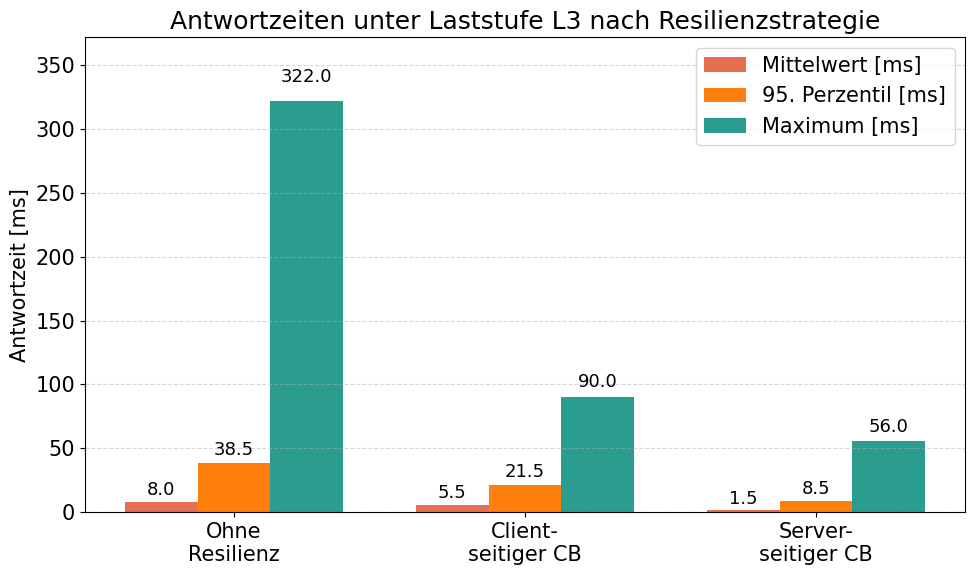

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})

# Daten (ms)
profile = [
    "Ohne\nResilienz",
    "Client-\nseitiger CB",
    "Server-\nseitiger CB"
]
mittelwert = [8.0, 5.5, 1.5]
p95 = [38.5, 21.5, 8.5]
maximum = [322.0, 90.0, 56.0]

x = np.arange(len(profile))
breite = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - breite, mittelwert, width=breite, label='Mittelwert [ms]', color='#e76f51')
bars2 = ax.bar(x, p95, width=breite, label='95. Perzentil [ms]', color='#ff7f0e')
bars3 = ax.bar(x + breite, maximum, width=breite, label='Maximum [ms]', color='#2a9d8f')

ax.set_ylabel('Antwortzeit [ms]')
ax.set_title('Antwortzeiten unter Laststufe L3 nach Resilienzstrategie')
ax.set_xticks(x)
ax.set_xticklabels(profile)
ax.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + yval * 0.03 + 2, 
            f'{yval:.1f}',
            ha='center',
            va='bottom',
            fontsize=13
        )

ax.set_ylim(0, max(maximum) + 50)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


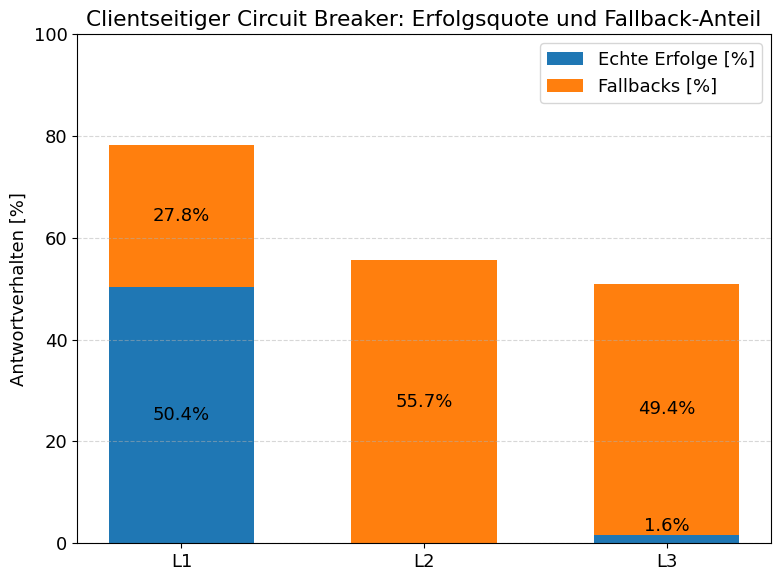

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Globale Schriftgröße
plt.rcParams.update({'font.size': 13})

# Laststufen
stufen = ["L1", "L2", "L3"]

# Erfolgsquote inkl. Fallbacks [%]
gesamt = np.array([78.2, 55.7, 51.0])

# Fallback-Anteil [%]
fallbacks = np.array([27.8, 55.7, 49.4])  # L2 = nur Fallbacks

# Echte Erfolge (Gesamt - Fallback)
echt = gesamt - fallbacks

# X-Achse und Balkenbreite
x = np.arange(len(stufen))
breite = 0.6

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, echt, width=breite, label='Echte Erfolge [%]', color='#1f77b4')
bars2 = ax.bar(x, fallbacks, width=breite, bottom=echt, label='Fallbacks [%]', color='#ff7f0e')

# Achsentitel und Diagrammtitel
ax.set_ylabel('Antwortverhalten [%]')
ax.set_title('Clientseitiger Circuit Breaker: Erfolgsquote und Fallback-Anteil')
ax.set_xticks(x)
ax.set_xticklabels(stufen)
ax.set_ylim(0, 100)
ax.legend()

# Werte auf Balken schreiben – dynamisch bei kleinen Werten
for i in range(len(stufen)):
    # Echte Erfolge – mittig oder oberhalb bei kleinen Balken
    if echt[i] > 5:
        ax.text(x[i], echt[i] / 2, f'{echt[i]:.1f}%', ha='center', va='center', color='black', fontsize=13)
    elif echt[i] > 0:
        ax.text(x[i], echt[i] + 0.01, f'{echt[i]:.1f}%', ha='center', va='bottom', color='black', fontsize=13)

    # Fallbacks – immer mittig im oberen Balken
    ax.text(x[i], echt[i] + fallbacks[i] / 2, f'{fallbacks[i]:.1f}%', ha='center', va='center', color='black', fontsize=13)

# Gitter und Layout
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


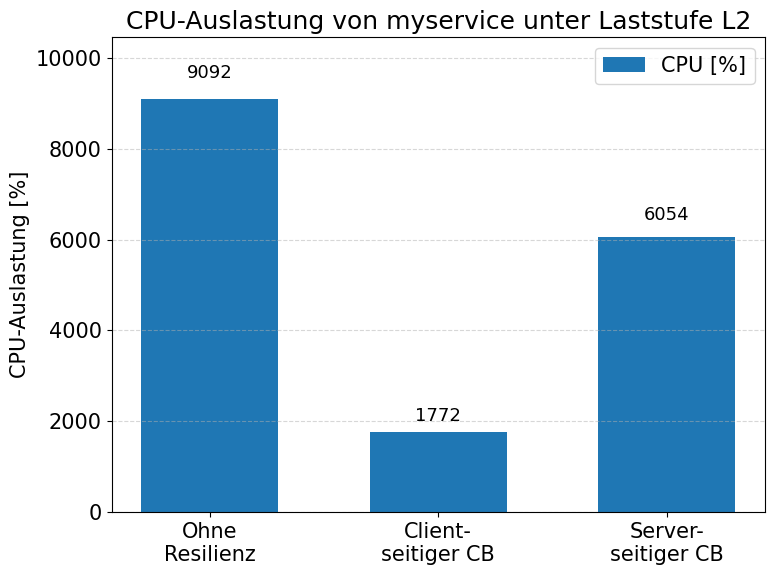

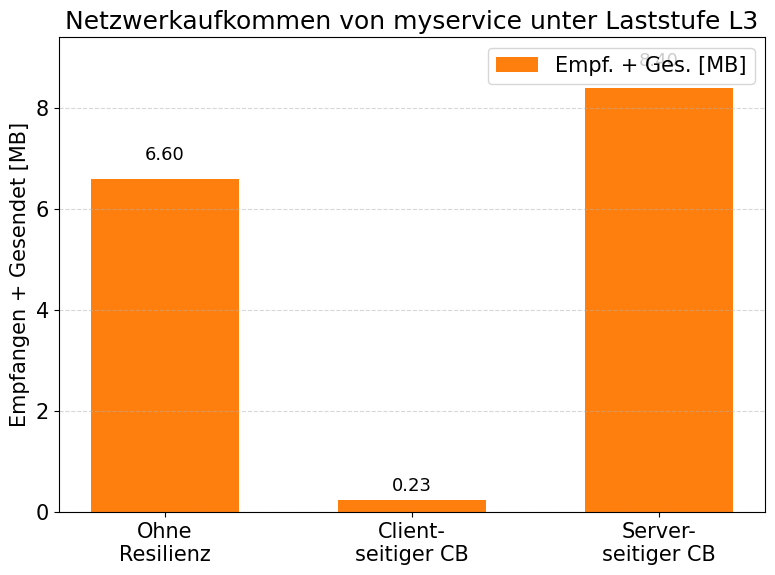

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Globale Schriftgröße
plt.rcParams.update({'font.size': 15})

# --------------------------------------
# Diagramm 1: CPU-Auslastung unter L2
# --------------------------------------
profile = ["Ohne\nResilienz", "Client-\nseitiger CB", "Server-\nseitiger CB"]
cpu_l2 = [9092, 1772, 6054]
x = np.arange(len(profile))
breite = 0.6

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x, cpu_l2, width=breite, color='#1f77b4', label='CPU [%]')
ax.set_ylabel('CPU-Auslastung [%]')
ax.set_title('CPU-Auslastung von myservice unter Laststufe L2')
ax.set_xticks(x)
ax.set_xticklabels(profile)
ax.legend(loc='upper right')

for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + yval * 0.03 + 100,
        f'{yval:.0f}',
        ha='center',
        va='bottom',
        fontsize=13
    )

ax.set_ylim(0, max(cpu_l2) * 1.15)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------------------------
# Diagramm 2: Netzwerkaufkommen unter L3
# --------------------------------------
netzwerk_l3 = [6.6, 0.231, 8.4]
x = np.arange(len(profile))

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x, netzwerk_l3, width=breite, color='#ff7f0e', label='Empf. + Ges. [MB]')
ax.set_ylabel('Empfangen + Gesendet [MB]')
ax.set_title('Netzwerkaufkommen von myservice unter Laststufe L3')
ax.set_xticks(x)
ax.set_xticklabels(profile)
ax.legend(loc='upper right')

for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + yval * 0.03 + 0.1,
        f'{yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=13
    )

ax.set_ylim(0, max(netzwerk_l3) + 1)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


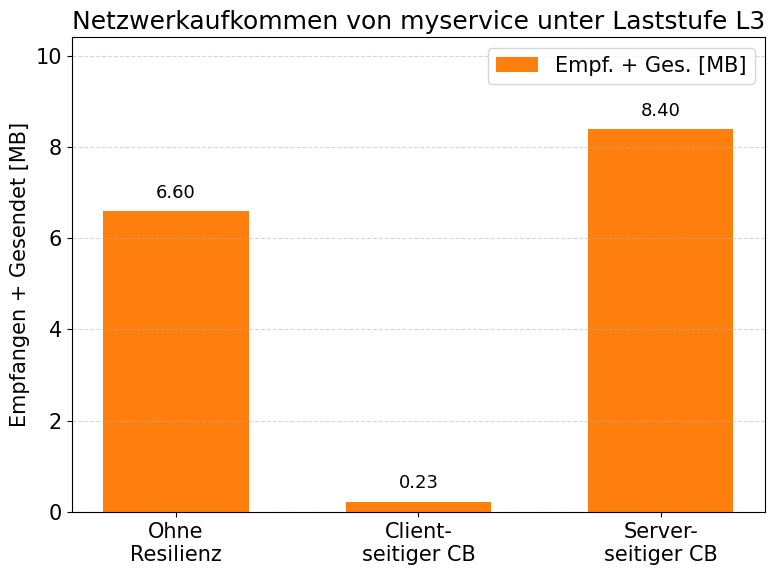

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Globale Schriftgröße
plt.rcParams.update({'font.size': 15})

# Strategien
profile = ["Ohne\nResilienz", "Client-\nseitiger CB", "Server-\nseitiger CB"]
netzwerk_l3 = [6.6, 0.231, 8.4]

x = np.arange(len(profile))
breite = 0.6

fig, ax = plt.subplots(figsize=(8, 6))  # Höhe vergrößert
bars = ax.bar(x, netzwerk_l3, width=breite, color='#ff7f0e', label='Empf. + Ges. [MB]')
ax.set_ylabel('Empfangen + Gesendet [MB]')
ax.set_title('Netzwerkaufkommen von myservice unter Laststufe L3')
ax.set_xticks(x)
ax.set_xticklabels(profile)
ax.set_ylim(0, max(netzwerk_l3) + 2)  # mehr Platz nach oben
ax.legend(loc='upper right')

# Gitterlinien
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Werte über Balken schreiben
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.2,
        f'{yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=13
    )

plt.tight_layout()
plt.show()

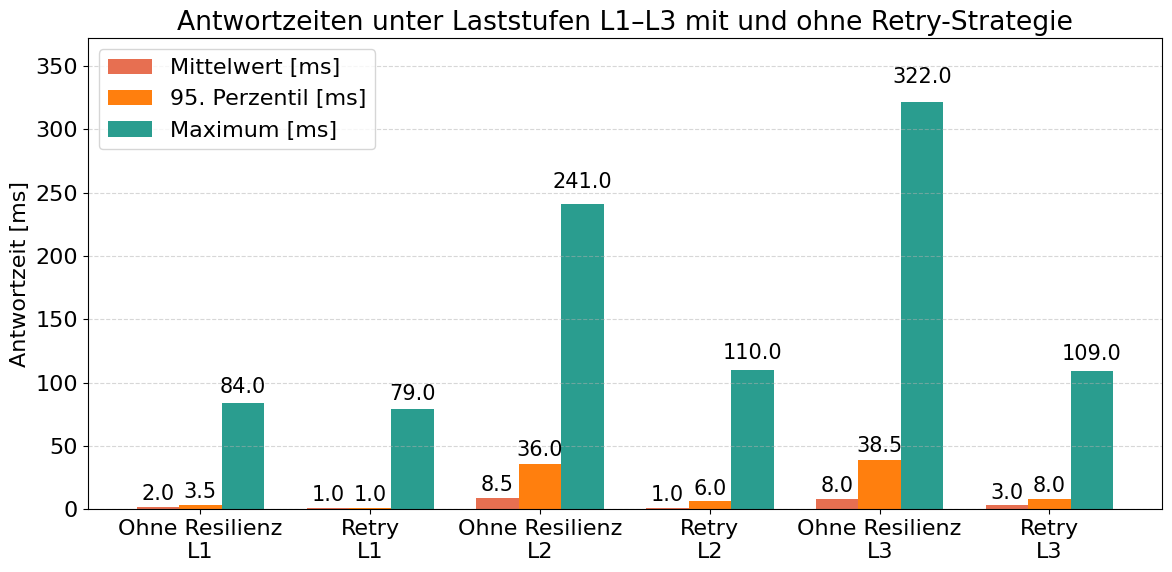

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16})

# Kategorien je Laststufe
profile = [
    "Ohne Resilienz\nL1", "Retry\nL1",
    "Ohne Resilienz\nL2", "Retry\nL2",
    "Ohne Resilienz\nL3", "Retry\nL3"
]

# Werte [ms] – aus Tabelle übernommen
mittelwert = [2.0, 1.0, 8.5, 1.0, 8.0, 3.0]
p95 = [3.5, 1.0, 36.0, 6.0, 38.5, 8.0]
maximum = [84.0, 79.0, 241.0, 110.0, 322.0, 109.0]

x = np.arange(len(profile))
breite = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - breite, mittelwert, width=breite, label='Mittelwert [ms]', color='#e76f51')
bars2 = ax.bar(x, p95, width=breite, label='95. Perzentil [ms]', color='#ff7f0e')
bars3 = ax.bar(x + breite, maximum, width=breite, label='Maximum [ms]', color='#2a9d8f')

ax.set_ylabel('Antwortzeit [ms]')
ax.set_title('Antwortzeiten unter Laststufen L1–L3 mit und ohne Retry-Strategie')
ax.set_xticks(x)
ax.set_xticklabels(profile, rotation=0)
ax.legend()

# Balkenbeschriftungen
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + yval * 0.03 + 2,
            f'{yval:.1f}',
            ha='center',
            va='bottom',
            fontsize=15
        )

ax.set_ylim(0, max(maximum) + 50)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


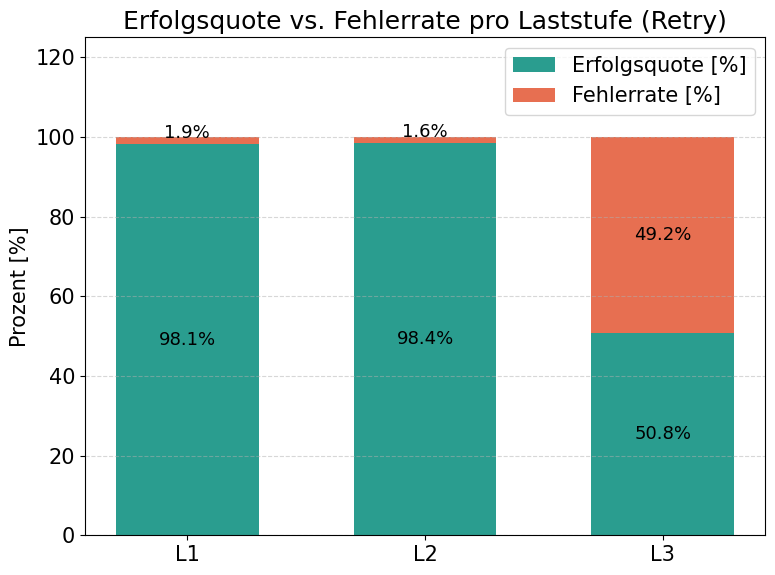

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Globale Schriftgröße
plt.rcParams.update({'font.size': 15})

# Daten
stufen = ["L1", "L2", "L3"]
erfolg = np.array([98.1, 98.4, 50.8])
fehler = np.array([1.9, 1.6, 49.2])

x = np.arange(len(stufen))
breite = 0.6

fig, ax = plt.subplots(figsize=(8, 6))  # Höhe vergrößert
bars1 = ax.bar(x, erfolg, width=breite, label='Erfolgsquote [%]', color='#2a9d8f')
bars2 = ax.bar(x, fehler, width=breite, bottom=erfolg, label='Fehlerrate [%]', color='#e76f51')

ax.set_ylabel('Prozent [%]')
ax.set_title('Erfolgsquote vs. Fehlerrate pro Laststufe (Retry)')
ax.set_xticks(x)
ax.set_xticklabels(stufen)
ax.set_ylim(0, 125)
ax.legend(loc='upper right')

# Balkenbeschriftungen
for i in range(len(x)):
    ax.text(x[i], erfolg[i] / 2, f'{erfolg[i]:.1f}%', ha='center', va='center', color='black', fontsize=13)
    
    # Offset für obere Beschriftung – höher platzieren
    offset = 2 if fehler[i] < 5 else 0
    ax.text(
        x[i],
        erfolg[i] + fehler[i] / 2 + offset,
        f'{fehler[i]:.1f}%',
        ha='center',
        va='center',
        color='black',
        fontsize=13
    )

ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


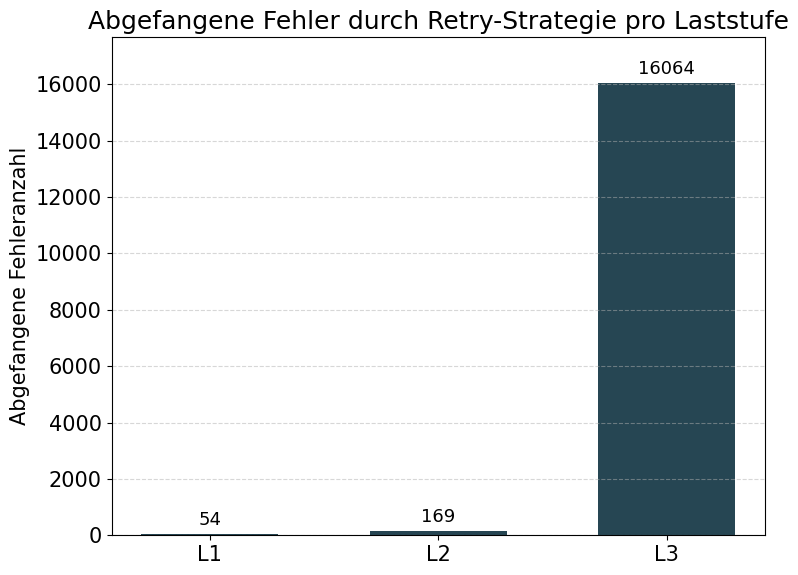

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Globale Schriftgröße
plt.rcParams.update({'font.size': 15})

# Daten
profile = ["L1", "L2", "L3"]
fehleranzahl = [54, 169, 16064]

x = np.arange(len(profile))
breite = 0.6

# Diagramm erzeugen
fig, ax = plt.subplots(figsize=(8, 6))  # ausreichend Platz nach oben
bars = ax.bar(x, fehleranzahl, width=breite, color='#264653')

# Achsenbeschriftung
ax.set_ylabel('Abgefangene Fehleranzahl')
ax.set_title('Abgefangene Fehler durch Retry-Strategie pro Laststufe')
ax.set_xticks(x)
ax.set_xticklabels(profile)
ax.set_ylim(0, max(fehleranzahl) * 1.1)  # Platz für Beschriftung

# Gitter
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Zahlen über Balken schreiben
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + max(fehleranzahl) * 0.01,  # kleiner Abstand nach oben
        f'{int(yval)}',
        ha='center',
        va='bottom',
        fontsize=13
    )

plt.tight_layout()
plt.show()

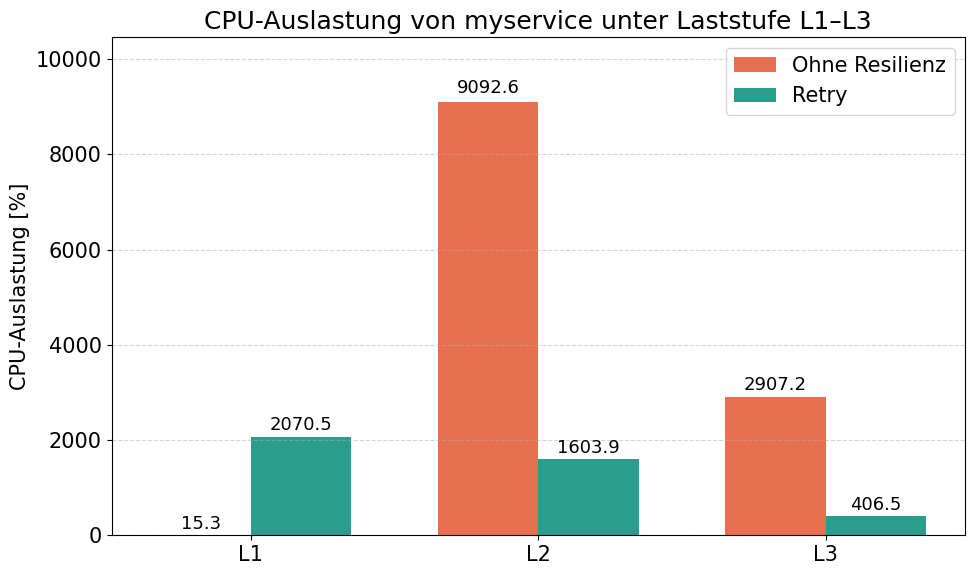

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Schriftgröße global anpassen
plt.rcParams.update({'font.size': 15})

# Laststufen
stufen = ["L1", "L2", "L3"]

# CPU-Daten
ohne_resilienz = [15.3, 9092.6, 2907.2]
retry = [2070.5, 1603.9, 406.5]

x = np.arange(len(stufen))
breite = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - breite / 2, ohne_resilienz, width=breite, label='Ohne Resilienz', color='#e76f51')
bars2 = ax.bar(x + breite / 2, retry, width=breite, label='Retry', color='#2a9d8f')

ax.set_ylabel('CPU-Auslastung [%]')
ax.set_title('CPU-Auslastung von myservice unter Laststufe L1–L3')
ax.set_xticks(x)
ax.set_xticklabels(stufen)
ax.legend(loc='upper right')

# Balkenbeschriftungen
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + yval * 0.01 + 30,
            f'{yval:.1f}',
            ha='center',
            va='bottom',
            fontsize=13
        )

ax.set_ylim(0, max(ohne_resilienz + retry) * 1.15)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


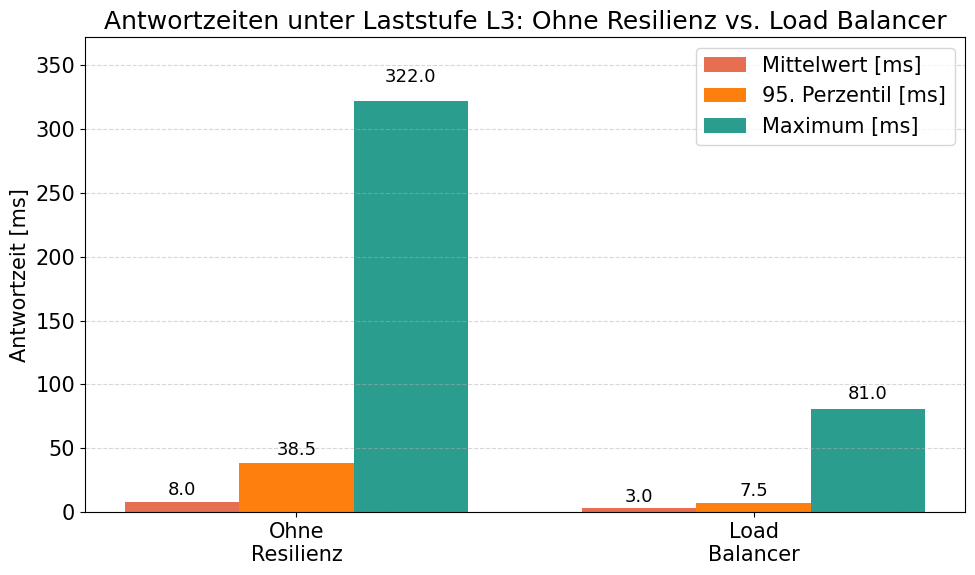

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Schriftgröße für Diagramm
plt.rcParams.update({'font.size': 15})

# Daten (in Millisekunden)
profile = [
    "Ohne\nResilienz",
    "Load\nBalancer"
]
mittelwert = [8.0, 3.0]
p95 = [38.5, 7.5]
maximum = [322.0, 81.0]

x = np.arange(len(profile))
breite = 0.25

# Diagramm erzeugen
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - breite, mittelwert, width=breite, label='Mittelwert [ms]', color='#e76f51')
bars2 = ax.bar(x, p95, width=breite, label='95. Perzentil [ms]', color='#ff7f0e')
bars3 = ax.bar(x + breite, maximum, width=breite, label='Maximum [ms]', color='#2a9d8f')

# Achsenbeschriftung und Titel
ax.set_ylabel('Antwortzeit [ms]')
ax.set_title('Antwortzeiten unter Laststufe L3: Ohne Resilienz vs. Load Balancer')
ax.set_xticks(x)
ax.set_xticklabels(profile)
ax.legend()

# Zahlen über den Balken anzeigen
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + yval * 0.03 + 2,
            f'{yval:.1f}',
            ha='center',
            va='bottom',
            fontsize=13
        )

# Y-Achse begrenzen
ax.set_ylim(0, max(maximum) + 50)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


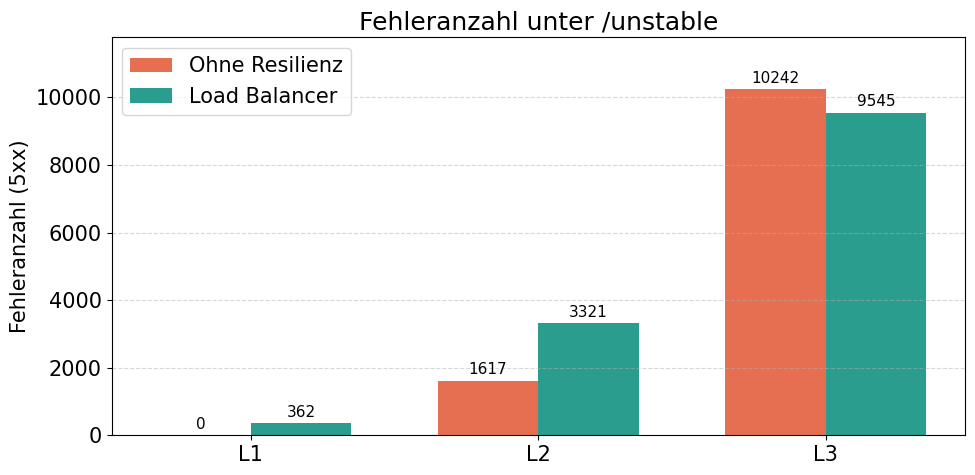

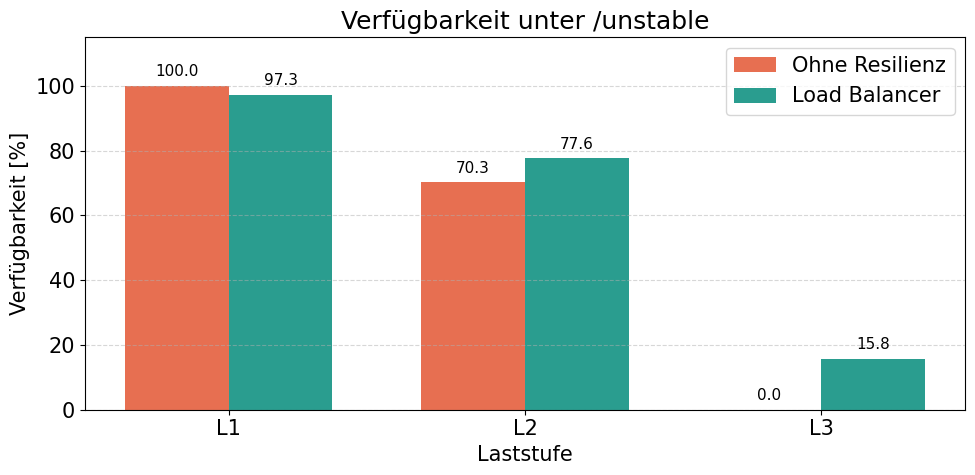

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Laststufen definieren
stufen = ["L1", "L2", "L3"]
x = np.arange(len(stufen))
width = 0.35

# Fehleranzahl (5xx)
fehler_default = [0, 1617, 10242]
fehler_lb = [362, 3321, 9545]

# Verfügbarkeit in Prozent
verfuegbarkeit_default = [100.0, 70.3, 0.0]
verfuegbarkeit_lb = [97.3, 77.6, 15.8]

# Diagramm 1: Fehleranzahl
fig1, ax1 = plt.subplots(figsize=(10, 5))
bars1 = ax1.bar(x - width/2, fehler_default, width, label='Ohne Resilienz', color='#e76f51')
bars2 = ax1.bar(x + width/2, fehler_lb, width, label='Load Balancer', color='#2a9d8f')

ax1.set_ylabel('Fehleranzahl (5xx)')
ax1.set_title('Fehleranzahl unter /unstable')
ax1.set_xticks(x)
ax1.set_xticklabels(stufen)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_ylim(top=max(max(fehler_default), max(fehler_lb)) * 1.15)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            height + 100,
            f'{height:.0f}',
            ha='center',
            va='bottom',
            fontsize=11
        )

plt.tight_layout()
plt.show()

# Diagramm 2: Verfügbarkeit
fig2, ax2 = plt.subplots(figsize=(10, 5))
bars3 = ax2.bar(x - width/2, verfuegbarkeit_default, width, label='Ohne Resilienz', color='#e76f51')
bars4 = ax2.bar(x + width/2, verfuegbarkeit_lb, width, label='Load Balancer', color='#2a9d8f')

ax2.set_ylabel('Verfügbarkeit [%]')
ax2.set_title('Verfügbarkeit unter /unstable')
ax2.set_xlabel('Laststufe')
ax2.set_xticks(x)
ax2.set_xticklabels(stufen)
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_ylim(0, 115)

for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width() / 2,
            height + 2,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=11
        )

plt.tight_layout()
plt.show()


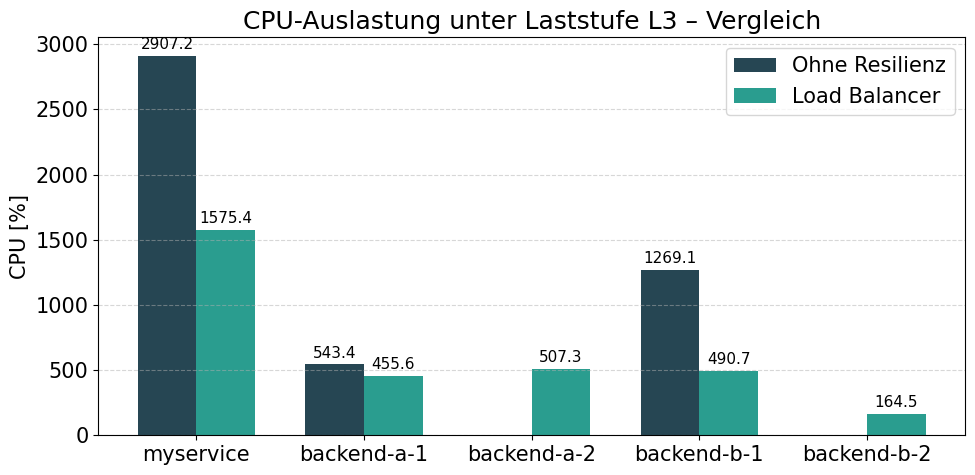

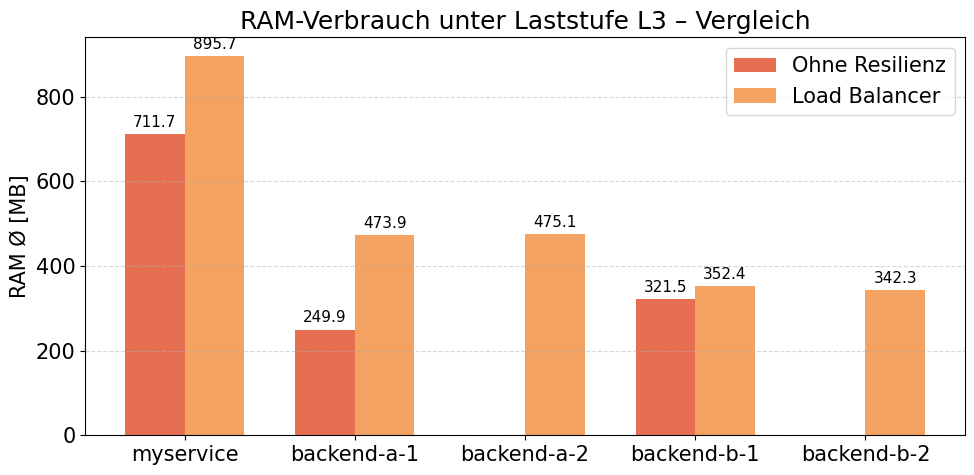

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Container-Namen
container = [
    "myservice",
    "backend-a-1",
    "backend-a-2",
    "backend-b-1",
    "backend-b-2"
]

x = np.arange(len(container))
width = 0.35

# CPU-Werte für L3
cpu_default = [2907.2, 543.4, 0, 1269.1, 0]               # Ohne Resilienz
cpu_lb = [1575.4, 455.6, 507.3, 490.7, 164.5]              # Load Balancer

# RAM-Werte für L3 (Ø MB)
ram_default = [711.7, 249.9, 0, 321.5, 0]                  # Ohne Resilienz
ram_lb = [895.7, 473.9, 475.1, 352.4, 342.3]               # Load Balancer

# ===========================
# CPU-Diagramm
# ===========================
fig_cpu, ax_cpu = plt.subplots(figsize=(10, 5))
bars1 = ax_cpu.bar(x - width/2, cpu_default, width, label='Ohne Resilienz', color='#264653')
bars2 = ax_cpu.bar(x + width/2, cpu_lb, width, label='Load Balancer', color='#2a9d8f')

ax_cpu.set_ylabel('CPU [%]')
ax_cpu.set_title('CPU-Auslastung unter Laststufe L3 – Vergleich')
ax_cpu.set_xticks(x)
ax_cpu.set_xticklabels(container)
ax_cpu.legend()
ax_cpu.grid(axis='y', linestyle='--', alpha=0.5)   # Nur horizontale Linien
ax_cpu.grid(axis='x', visible=False)               # Vertikale Linien ausblenden

# Werte über den Balken anzeigen
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax_cpu.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:.1f}',
                        ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# ===========================
# RAM-Diagramm
# ===========================
fig_ram, ax_ram = plt.subplots(figsize=(10, 5))
bars3 = ax_ram.bar(x - width/2, ram_default, width, label='Ohne Resilienz', color='#e76f51')
bars4 = ax_ram.bar(x + width/2, ram_lb, width, label='Load Balancer', color='#f4a261')

ax_ram.set_ylabel('RAM Ø [MB]')
ax_ram.set_title('RAM-Verbrauch unter Laststufe L3 – Vergleich')
ax_ram.set_xticks(x)
ax_ram.set_xticklabels(container)
ax_ram.legend()
ax_ram.grid(axis='y', linestyle='--', alpha=0.5)   # Nur horizontale Linien
ax_ram.grid(axis='x', visible=False)               # Vertikale Linien ausblenden

# Werte über den Balken anzeigen
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax_ram.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:.1f}',
                        ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()
